# Circle detection using Scikit-images, by hough transform

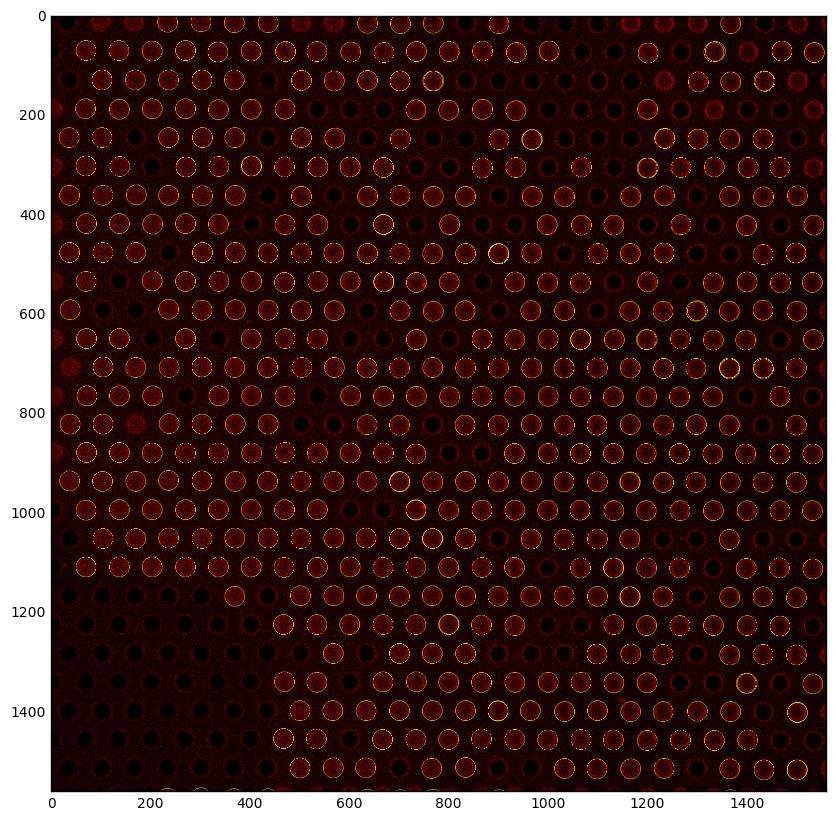

number of detected circles =  474


In [9]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread
from skimage.color import rgb2gray

# Load picture
pic = imread("images/Image 8.jpg")

#choose threshold for binary image
image = rgb2gray(pic) > 0.05
image = img_as_ubyte(image)

#detect edges
edges = canny(image, sigma=5, low_threshold=80, high_threshold=100)



# Select range of radii
hough_radii = np.arange(20, 21, 1)
# hough transform
hough_res = hough_circle(edges, hough_radii)

centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract n number of circles
    num_peaks = 600
    peaks = peak_local_max(h, min_distance=10, num_peaks=num_peaks, threshold_rel=0.4)
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius] * num_peaks)

# Draw the most prominent circles
image = color.gray2rgb(image)
for idx in np.argsort(accums)[::-1][:(len(accums)-1)]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, radius)
    # if max(cx)<1560 and max(cy)<1560:
    pic[cy, cx] = (220, 220, 20)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(pic, cmap=plt.cm.gray)
plt.show()
print("number of detected circles = ",len(accums))

- detects almost all circles correctly

- many circles are counted multiple times. peak_local_max() returns all pixel coordinates of flat peaks (same intensity maxima) even if they are separated by min_distance.
- initial pre-processing of image needs careful adjustments
    - rgb2gray(image) > threshold => generates grayscale binary image according to chosen threshold.
    - canny(image, sigma=5, low_threshold=80, high_threshold=100) => thresholds need to be chosen carefully for good edge detection.
- seems like thresholds need to be chosen for each and every image, even in a time series. 

# suppliamentary material

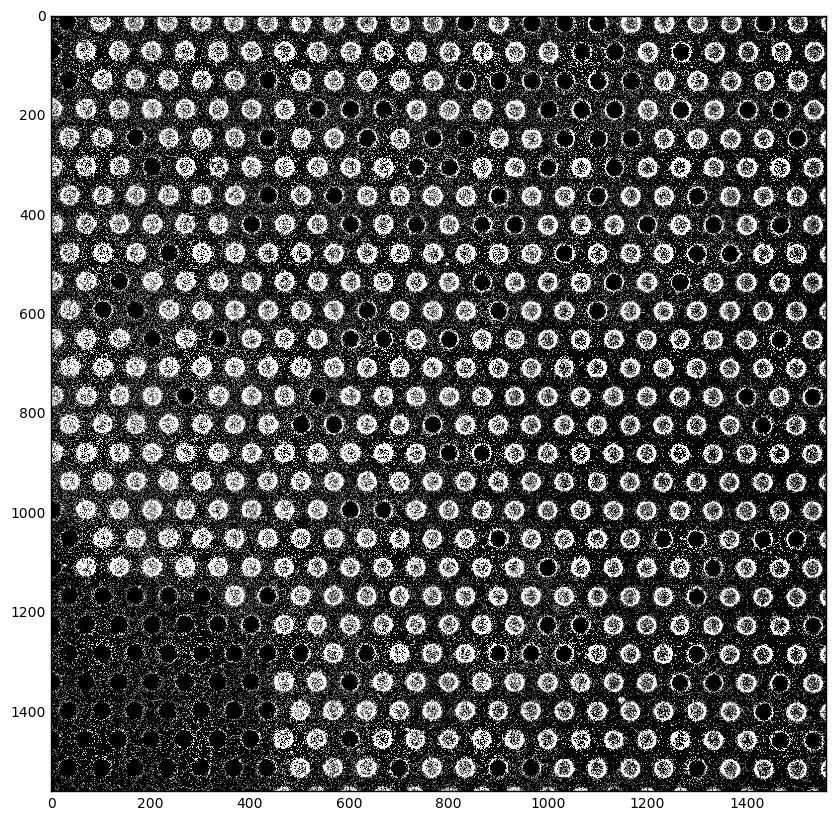

threshold at 0.05


In [16]:
#grayscale image

pic = imread("Image 8.jpg")

image = rgb2gray(pic) > 0.05
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.imshow(image, cmap=plt.cm.gray)
plt.show()
print("threshold at 0.05")

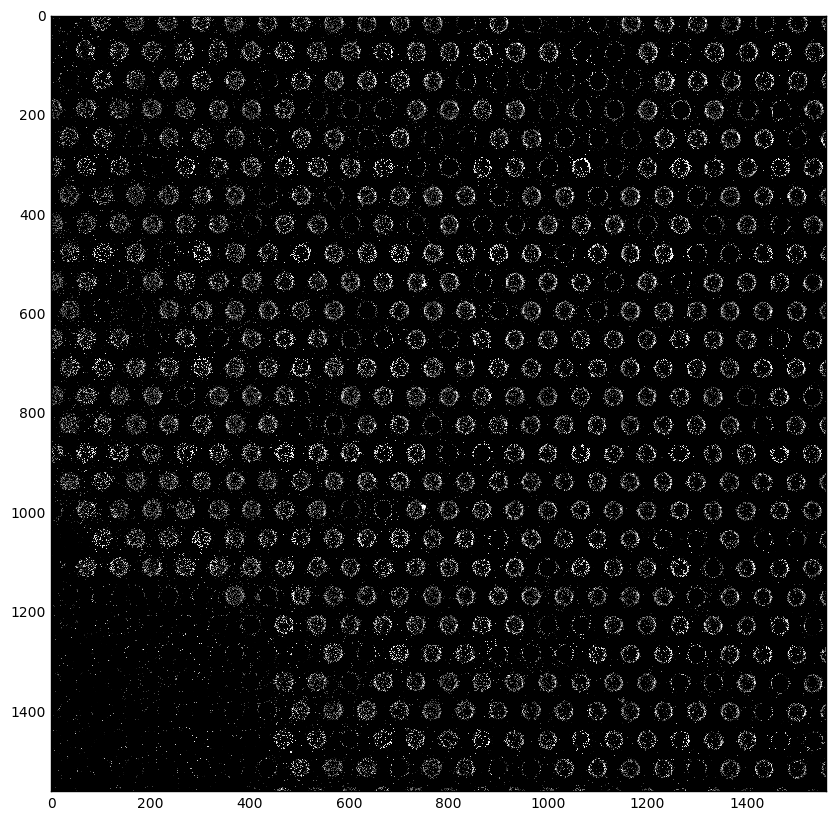

threshold at 0.1


In [18]:
image = rgb2gray(pic) > 0.1
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.imshow(image, cmap=plt.cm.gray)
plt.show()
print("threshold at 0.1")

depending on the threshold, edge detection varies in performance